# Basic WaCky Corpus Statistics
**Random Projections** can work in an incremental fashion. I want to test my algorithm against existing ones which require a fixed-size vocabulary to be available. The first thing I did was count the frequencies of the words in the first 1M sentences of the Wacky Corpus.

I used the lemmatised version of each word to reduce the variation in some words such as verbs. One requires only to know what verb it is and not the verbal form and tense.

This is only a restrictino to be applied in these exploratory analysis. Later on, it will be nice to analyse the impact of word morphology, verb tense and form, etc. The idea is to add as much linguistic information as necessary without the need to learn these properties from scratch. This can be easily done with random projections and convolution operations as we will see in future experiments.

In [1]:
%matplotlib inline

import h5py
import os.path
import numpy as np

import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [12]:
home = os.getenv("HOME")
result_path = home+"/data/results/"
vocab_fname = "wacky_vocabulary_.hdf5"
vocab_stop_fname = "wacky_vocabulary_stop.hdf5"

vocab_file = result_path + vocab_fname
vocab_file_stop = result_path + vocab_stop_fname


h5v = h5py.File(vocab_file, 'r')
h5v_stop = h5py.File(vocab_file_stop, 'r')

vocabulary = h5v["vocabulary"]
frequencies = h5v["frequencies"]

vocabulary_stop = h5v_stop["vocabulary"]
frequencies_stop = h5v_stop["frequencies"]

print(vocabulary[1:10])
print(frequencies[1:10])

print(vocabulary_stop[1:10])
print(frequencies_stop[1:10])

['work' 'year' 'T_CURRENCY' 'time' 'T_URL' 'good' 'new' 'people' 'include']
[44287 43785 43637 40788 34447 34054 33887 31793 29271]
['of' 'and' 'be' 'to' 'a' 'in' 'for' 'have' 'that']
[695481 678916 660054 608924 470114 425547 253375 218965 192514]


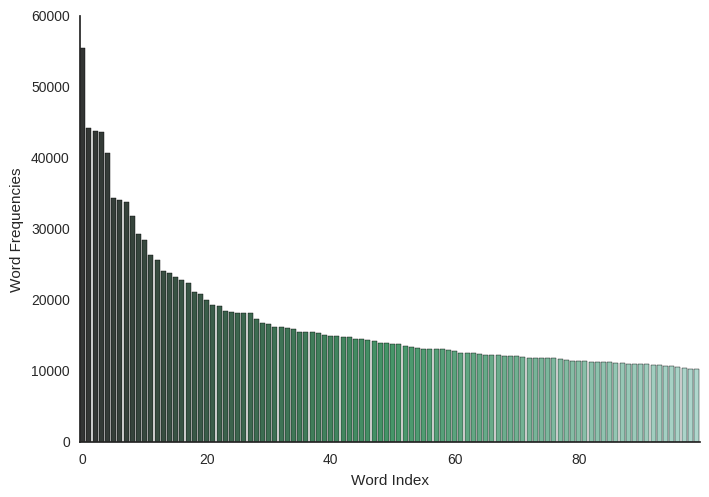

In [13]:
top_n = 100
sns.set(style="white")


# NO STOP WORDS **********************************************************
x = np.arange(0,top_n)
y = np.array(frequencies[0:top_n])


ax = sns.barplot(x, y, palette="BuGn_d")
#ax = sns.distplot()
ax.set_ylabel("Word Frequencies")
ax.set_xlabel("Word Index")

ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=20))

sns.despine()

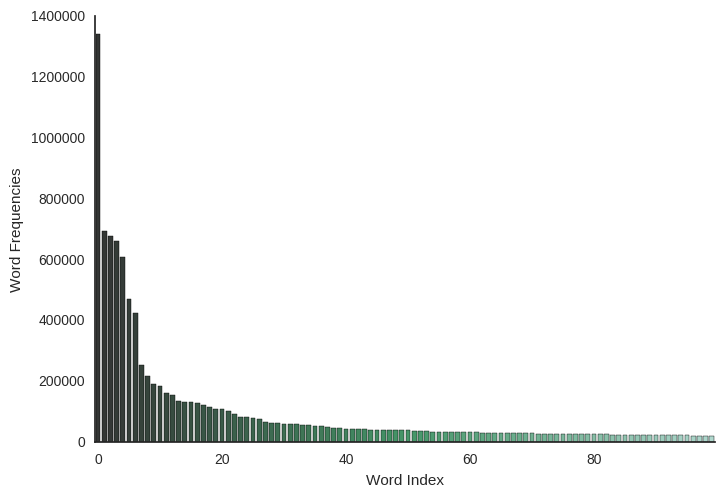

In [14]:
# STOP WORDS *************************************************************
x = np.arange(0,top_n)
y = np.array(frequencies_stop[0:top_n])


ax = sns.barplot(x, y, palette="BuGn_d")
ax.set_ylabel("Word Frequencies")
ax.set_xlabel("Word Index")

ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=20))

sns.despine()

The difference between word frequencies with and without stop words being removed is obvious.

In [15]:
# A Zipf plot
top_n = 1000
ranks = np.arange(1, top_n+1)
freq = np.array(frequencies[0:top_n])
freq_stop = np.array(frequencies_stop[0:top_n])

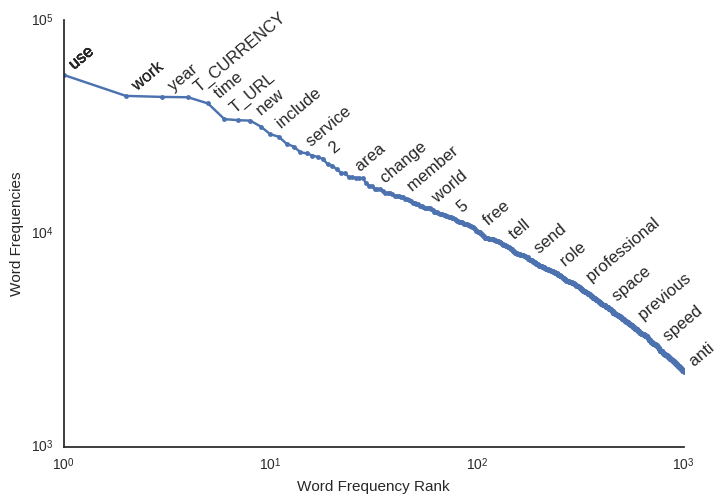

In [27]:
#ax = sns.regplot(ranks,freq)
#ax.set_yscale='log'
#ax.set_xscale='log'


ax = plt.loglog(ranks, freq, marker=".")
sns.despine()

plt.ylabel("Word Frequencies")
plt.xlabel("Word Frequency Rank")

for n in list(np.logspace(-0.5, np.log10(top_n-1), 29).astype(int)):
    dummy = plt.text(ranks[n], freq[n], " " + vocabulary[n], 
            verticalalignment="bottom",
            horizontalalignment="left",
                     rotation=40)

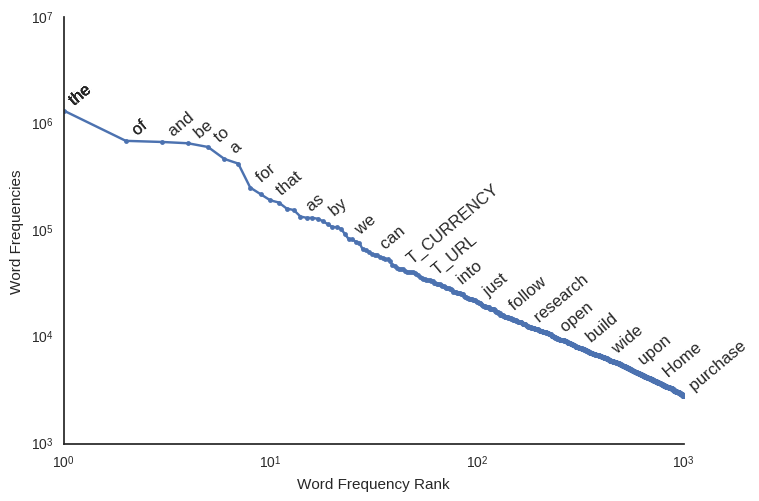

In [29]:
ax = plt.loglog(ranks, freq_stop, marker=".")
sns.despine()

plt.ylabel("Word Frequencies")
plt.xlabel("Word Frequency Rank")

for n in list(np.logspace(-0.5, np.log10(top_n-1), 29).astype(int)):
    dummy = plt.text(ranks[n], freq_stop[n], " " + vocabulary_stop[n], 
            verticalalignment="bottom",
            horizontalalignment="left",
                     rotation=40)

## Stop Word Frequency
Out of curiosity I would also like to know the frequency of the stopwords I'm using.

In [49]:
from deepsign.nlp.stoplist import ENGLISH_LIST


stop_en = np.array(ENGLISH_LIST)
print(stop_en.shape)

()


In [10]:
h5v.close()
h5v_stop.close()

A better way to represent this is perhaps a curve like what we find with [Zipf's Law](https://en.wikipedia.org/wiki/Zipf%27s_law)